<a href="https://colab.research.google.com/github/koteshvarma2/Data_Science/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Sample:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

Model Evaluation:
R² Score: 0.437
Mean Absolute Error (MAE): 0.667
Root Mean Squared Error (RMSE): 0.839

Feature Coefficients:
       Feature  Coefficient
1         size     0.233484
3    smoker_No     0.192353
4      day_Fri     0.179721
6      day_Sun     0.128928
0   total_bill     0.094700
5      day_Sat    -0.006064
2   sex_Female    -0.028819
7  time_Dinner    -0.094957 



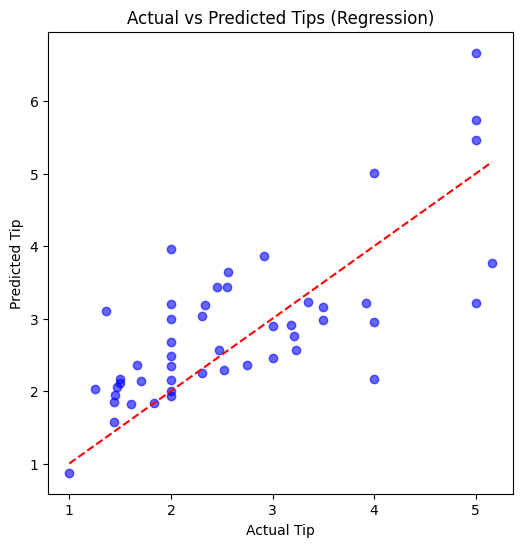

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

print("Dataset Sample:")
print(tips.head(), "\n")

tips_encoded = pd.get_dummies(tips, drop_first=True)

X = tips_encoded.drop("tip", axis=1)
y = tips_encoded["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}\n")

coefficients = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_}).sort_values(by="Coefficient", ascending=False)

print("Feature Coefficients:")
print(coefficients, "\n")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs Predicted Tips (Regression)")
plt.show()
